From the given dataset predict the optimum number of clusters and represent it visually

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [231]:
file = pd.read_csv("Iris.csv")

In [232]:
file= file.drop(['Id'], axis = 1)
file.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [233]:
#checking for Null values
file.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [234]:
#Label Encoding - for encoding categorical features into numerical ones
encoder = LabelEncoder()
file['Species'] = encoder.fit_transform(file['Species'])
file.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0.5, 1.0, 'Scatter Plot')

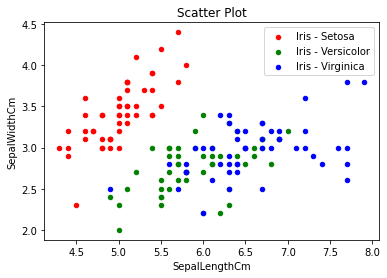

In [235]:
ax = file[file.Species==0].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='Iris - Setosa')
file[file.Species==1].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='Iris - Versicolor', ax=ax)
file[file.Species==2].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='Iris - Virginica', ax=ax)
ax.set_title("Scatter Plot")

In [236]:
data = file.values

X=data[:, :4]
Y=data[:, -1]

X_train = X[:112, ]
y_train = Y[:112, ]

X_test = X[112:150, ]
y_test = Y[112:150, ]

# X=file.drop('Species', axis=1)
# Y=file.Species

# X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.25)


In [237]:
model = KMeans(n_clusters=3)
model.fit(X_train, y_train)

pred = model.predict(X_test)

c:\Users\Moaz Tahir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [242]:
print(accuracy_score(y_test, pred)*100)

100.0


In [243]:
#classification report for training set 
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00        38

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

